In [67]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [69]:
pizza = pd.read_csv('pizza.csv')
pizza

,Promote,Sales
0,23,554
1,56,1339
2,34,815
3,25,609
4,67,1600
5,82,2000
6,46,1000
7,14,300
8,6,150
9,47,1150


In [71]:
X = pizza[['Promote']]
y = pizza['Sales']

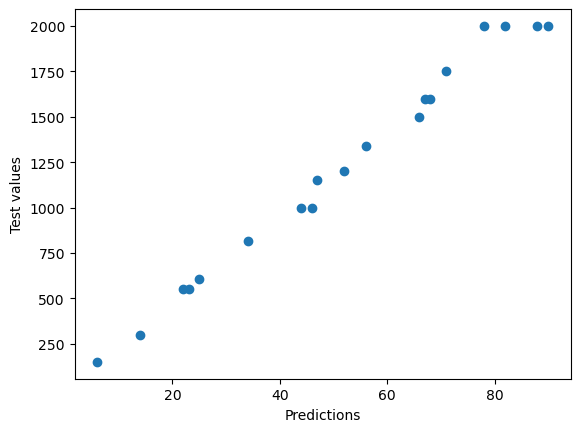

In [91]:
X_train, X_test, Y_train , Y_test = train_test_split(X,y,test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
plt.scatter(X, y)
plt.xlabel('Predictions')
plt.ylabel('Test values')
plt.show()

In [73]:

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [75]:
print('b0', lr.intercept_)
print('b1', lr.coef_)

b0 5.4858653632529695
b1 [23.50640302]


In [ ]:
#When x values are 100, 200, 250, 300

In [89]:
y1 = 5.4858653632529695 + 78 * 23.50640302
print(y1)
y2 = 5.4858653632529695 + 200 * 23.50640302
print(y2)
y3 = 5.4858653632529695 + 250 * 23.50640302
print(y3)
y4 = 5.4858653632529695 + 300 * 23.50640302
print(y4)

1838.985300923253
4706.766469363253
5882.086620363253
7057.406771363253


# Inferencing 

In [93]:
tst_promote = np.array([100,200,250,300])
tst_promote* 23.50640302 + 5.4858653632529695

array([2356.12616736, 4706.76646936, 5882.08662036, 7057.40677136])

In [99]:
tst  = pd.DataFrame({'Promote' :tst_promote})
tst

,Promote
0,100
1,200
2,250
3,300


In [101]:
y_p = lr.predict(tst)  

array([2330.8820851 , 4634.97916037, 5787.027698  , 6939.07623564])

# Polynomial Transformation

In [127]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
X = pizza[['Promote']]
y = pizza['Sales']

In [131]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [149]:
X_poly = poly.fit_transform(X)
X_poly

array([[2.300e+01, 5.290e+02],
       [5.600e+01, 3.136e+03],
       [3.400e+01, 1.156e+03],
       [2.500e+01, 6.250e+02],
       [6.700e+01, 4.489e+03],
       [8.200e+01, 6.724e+03],
       [4.600e+01, 2.116e+03],
       [1.400e+01, 1.960e+02],
       [6.000e+00, 3.600e+01],
       [4.700e+01, 2.209e+03],
       [5.200e+01, 2.704e+03],
       [8.800e+01, 7.744e+03],
       [7.100e+01, 5.041e+03],
       [7.800e+01, 6.084e+03],
       [6.600e+01, 4.356e+03],
       [4.400e+01, 1.936e+03],
       [6.800e+01, 4.624e+03],
       [9.000e+01, 8.100e+03],
       [2.200e+01, 4.840e+02]])

In [137]:
poly.get_feature_names_out()

array(['Promote', 'Promote^2'], dtype=object)

In [151]:
poly2 = PolynomialFeatures(degree=3,include_bias=False)
X_poly2 = poly2.fit_transform(X)
poly2.get_feature_names_out()
lr.fit(X_poly2,y)
X_poly2

array([[2.30000e+01, 5.29000e+02, 1.21670e+04],
       [5.60000e+01, 3.13600e+03, 1.75616e+05],
       [3.40000e+01, 1.15600e+03, 3.93040e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [6.70000e+01, 4.48900e+03, 3.00763e+05],
       [8.20000e+01, 6.72400e+03, 5.51368e+05],
       [4.60000e+01, 2.11600e+03, 9.73360e+04],
       [1.40000e+01, 1.96000e+02, 2.74400e+03],
       [6.00000e+00, 3.60000e+01, 2.16000e+02],
       [4.70000e+01, 2.20900e+03, 1.03823e+05],
       [5.20000e+01, 2.70400e+03, 1.40608e+05],
       [8.80000e+01, 7.74400e+03, 6.81472e+05],
       [7.10000e+01, 5.04100e+03, 3.57911e+05],
       [7.80000e+01, 6.08400e+03, 4.74552e+05],
       [6.60000e+01, 4.35600e+03, 2.87496e+05],
       [4.40000e+01, 1.93600e+03, 8.51840e+04],
       [6.80000e+01, 4.62400e+03, 3.14432e+05],
       [9.00000e+01, 8.10000e+03, 7.29000e+05],
       [2.20000e+01, 4.84000e+02, 1.06480e+04]])

In [153]:
print('b0', lr.intercept_)
print('b1', lr.coef_)

b0 82.19586845467893
b1 [ 1.47739093e+01  2.29013837e-01 -1.63766841e-03]
